# Lab Segmentation 1

In [13]:
from commonfunctions import *
from skimage.filters import threshold_mean,threshold_otsu
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
## For all requirements: The quality of the results is evaluated.


# 1- Read the image 
# [VERY IMPORTANT] and convert it to float: image = image.astype(float)

# read image golf



# 2- Retreive the 3 channels of the image(R,G,B) (will be used in the coming steps)


# 3- Visually (not by code) detect the dominating color channel (C) for the backgroung (R, G or B)

# 4- Draw the dominating channel (r, g or b) thresholded by some threshold (to make sure your choice is meaningful)


# 5- Get an intuitive way(There is a very simple way) to make a mask that can get the pixels where the values of the dominating channels 
# have larger values than the other channels with an appropriate threshold

# 6- display the binarized image






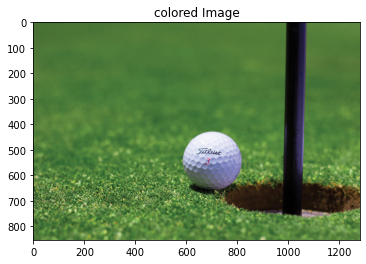

In [14]:
img = io.imread('imgs/exp1/golf.jpeg')
show_images([img],["colored Image"])

In [15]:
img = img.astype(float)
print(img.shape)
print(np.max(img))

(853, 1280, 3)
255.0


In [16]:
R = img[:,:,0]
G = img[:,:,1]
B = img[:,:,2]

### Dominat Color Channel is Green (more white Channel)

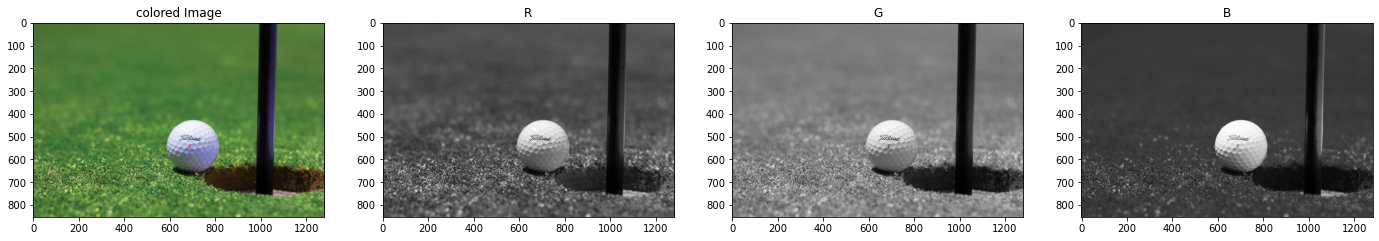

In [17]:
show_images([img.astype(np.uint8),R,G,B],["colored Image","R","G","B"])

In [18]:
thres = threshold_otsu(G)
print(thres)
R_thres = R > thres
G_thres = G > thres
B_thres = B > thres
# G_thres = G < thres
# B_thres = B < thres

R_thres = R_thres.astype(np.uint8)
G_thres = G_thres.astype(np.uint8)
B_thres = B_thres.astype(np.uint8)

79.189453125


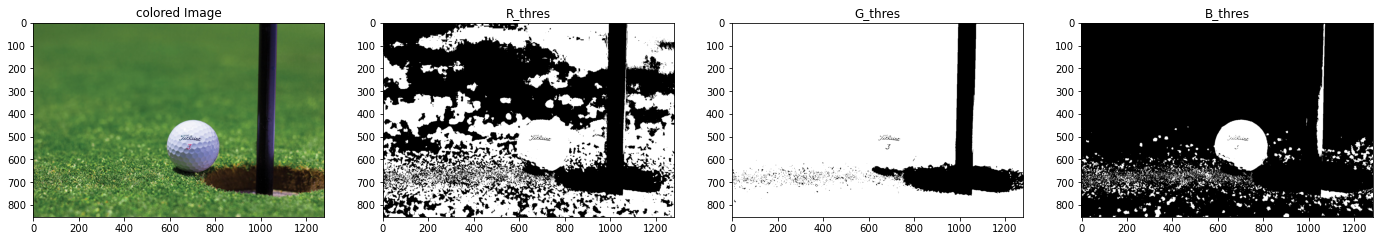

In [19]:
show_images([img.astype(np.uint8),R_thres,G_thres,B_thres],["colored Image","R_thres","G_thres","B_thres"])

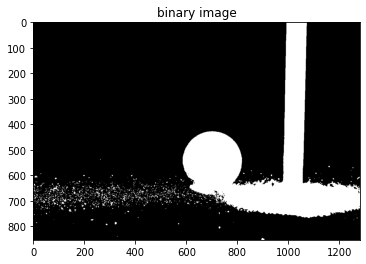

In [26]:
finalImage = ((G - R) > 10) *  ((G - B) > 40)
finalImage = 255 - finalImage
show_images([finalImage],["binary image"])

In [12]:
# test = rgb2gray (np.array(np.ones((100,100,3))*255).astype(np.uint8))
# test[:,0:50] = 0
# print(test)
# show_images([test],["binary image"])

In [ ]:
# 1- Get the required RGB color (Using a color picker)


# 2- Read image

# 3- extract R, G and B channels (as float)

# 4- calculate differences FOR EACH CHANNEL (between the image and the required pixel value)

# 5- calculate overall distance from the given RGB color (use any appropriate distance measure, take care of the minus distances)

# 6-  create a mask by thresholding the differences

# 7- In the input image, Replace the pixels of the mask with the following color
# R = 230 , G = 90 , B=40

# 8- show the image or save it


In [27]:
def changeColor(img , R_color,G_color,B_color):
    R_channel = np.array(img[:,:,0]).astype(np.float)
    G_channel = np.array(img[:,:,1]).astype(np.float)
    B_channel = np.array(img[:,:,2]).astype(np.float)
    
    diff_R_channel = R_channel - R_color
    diff_G_channel = G_channel - G_color
    diff_B_channel = B_channel - B_color
    
    D_2 = np.sqrt( (diff_R_channel)**2+(diff_G_channel)**2+(diff_B_channel)**2 )
    D_1 = np.abs(diff_R_channel)+np.abs(diff_G_channel)+np.abs(diff_B_channel)
    print(D_2)
#     print(np.array(D.astype(np.uint8)))
    show_images([np.array(D_2.astype(np.uint8))])
    test = img
    test[D_1 < 30] = [230,90,40]
    changeImg = img
    changeImg[D_2 < 30] = [230,90,40]
    show_images([changeImg,test])
    return changeImg

rgba(225,223,207,255)

[[297.00841739 300.41637772 302.12083675 ... 182.58696558 182.20318329
  183.64367672]
 [295.30492715 297.00841739 298.71223611 ... 184.0353227  183.64367672
  183.64367672]
 [293.60177111 293.60177111 295.30492715 ... 184.0353227  185.48854412
  185.48854412]
 ...
 [ 43.87482194  43.87482194  41.91658383 ...  38.88444419  39.23009049
   38.88444419]
 [ 36.40054945  38.28837944  39.57271787 ...  61.77378085  59.09314681
   60.42350536]
 [ 35.18522417  35.91656999  37.58989226 ... 162.19432789 150.43935655
  150.43935655]]


<ipython-input-27-28b63e316d11>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  R_channel = np.array(img[:,:,0]).astype(np.float)
<ipython-input-27-28b63e316d11>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  G_channel = np.array(img[:,:,1]).astype(np.float)
<ipython-input-27-28b63e316d11>:4: DeprecationWarning: `np.float` is a depreca

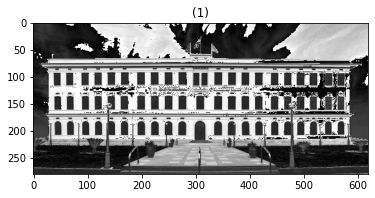

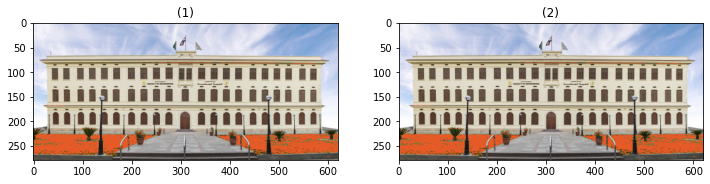

In [30]:
img = io.imread('imgs/exp2/cufe.png')
#changeImg = changeColor(img , 225,223,206)
changeImg = changeColor(img , 76,97,36)
